In [1]:
import logging
import pandas as  pd
log_file=r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\error_analysis.log"

In [2]:
logging.basicConfig(
    filename=log_file,
    filemode='a',
    level=logging.INFO,
    format="%(asctime)s-%(levelname)s-%(message)s"
)
logging.info('Analysis started!')

In [3]:
import os
import sys
sys.path.append(r"C:\Users\Rasulbek907\Desktop\Project_MP\Source")

In [4]:
from data_loader import DataLoader

In [5]:
path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Feature_Selection"
loader = DataLoader(path)

In [6]:
df = loader.load_datasets()

In [7]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19972 non-null  float64
 1   name_length            19972 non-null  float64
 2   is_organic             19972 non-null  float64
 3   is_sugar_free          14979 non-null  float64
 4   quantity_value         19972 non-null  float64
 5   quantity_unit_encoded  19972 non-null  float64
 6   category_depth         19972 non-null  float64
 7   country_count          19972 non-null  float64
 8   product_age_days       19972 non-null  float64
 9   created_year           14979 non-null  float64
 10  created_month          19972 non-null  float64
 11  main_category_encoded  19972 non-null  float64
 12  source_file            19996 non-null  object 
 13  Unnamed: 0.1           4993 non-null   float64
 14  nova_group             4993 non-null   float64
 15  Fe

In [8]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
num_col = df.select_dtypes(include=[np.number]).columns.drop('nova_group').tolist()
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [10]:
for col in cat_col:
    df[col]=df[col].astype(str)

In [11]:
if 'nova_group' not in df.columns:
    print("⚠️ Column 'nova_group' not found. Available columns are:")
    print(df.columns.tolist())
else:
    
    X = df.drop('nova_group', axis=1)
    y = df['nova_group']

In [12]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())

])

In [13]:

num_pipeline

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,feature_range,"(0, ...)"


In [14]:
cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [15]:
cat_pipeline

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [16]:
preprocessor=ColumnTransformer([
    
        ('num',num_pipeline,num_col),
        ('cat',cat_pipeline,cat_col)
    
])

In [17]:

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [18]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(random_state=42))
])

In [19]:

pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
# 1️⃣ NaN qiymatlarni olib tashlash
df = df.dropna(subset=['nova_group'])

# 2️⃣ X va y ni ajratish
X = df.drop(columns=['nova_group'])
y = df['nova_group']

# 3️⃣ Train-test ajratish
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4️⃣ Pipeline ni qayta o‘qitish
pipeline.fit(X_train, y_train)


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['is_sugar_free' 'created_year' 'Importance']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object','category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Fit qilish
pipeline.fit(X_train, y_train)

# Bashorat qilish
y_pred = pipeline.predict(X_test)


c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Rasulbek907\Desktop\Project_MP\venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.45260347129506007
F1 Score: 0.4544131398434128
Precision: 0.4566210665122046
Recall: 0.45260347129506007


# Error Analysis

In [32]:
import pandas as pd

# Natijalarni jadval ko‘rinishida ko‘rsatish
errors_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Correct': y_test == y_pred  # True agar to'g'ri bashorat qilinsa
})

# Xohlasangiz faqat xatoliklarni ko‘rsatish
errors_only_df = errors_df[errors_df['Correct'] == False]

print("Birinchi 5 ta natija:\n", errors_df.head())
print("\nXatoliklar jadvali:\n", errors_only_df.head())

Birinchi 5 ta natija:
       Actual  Predicted  Correct
5474     3.0        4.0    False
6271     1.0        2.0    False
6033     5.0        5.0     True
8814     4.0        4.0     True
6235     4.0        3.0    False

Xatoliklar jadvali:
       Actual  Predicted  Correct
5474     3.0        4.0    False
6271     1.0        2.0    False
6235     4.0        3.0    False
8286     4.0        1.0    False
9012     5.0        3.0    False


In [33]:
errors_df = errors_df.reset_index(drop=True)
x_test_reset = x_test.reset_index(drop=True)

In [34]:
result_df = pd.concat([x_test_reset, errors_df], axis=1)

In [35]:
print(result_df.head())

   Unnamed: 0  name_length  is_organic  is_sugar_free  quantity_value  \
0      3892.0    -1.162028   -0.121809            0.0        0.109449   
1      2140.0    -0.691811   -0.121809            0.0       -1.138126   
2      1117.0     0.718840   -0.121809            NaN        0.109449   
3      4528.0     2.129491   -0.121809            0.0       -0.281777   
4       867.0    -0.221594   -0.121809            0.0        0.891899   

   quantity_unit_encoded  category_depth  country_count  product_age_days  \
0              -0.425509        1.695392       0.634811          0.651946   
1              -1.013055       -0.364026       0.226987          0.329679   
2              -0.425509        1.106987       0.226987         -0.913930   
3              -0.425509       -0.364026      -0.588663          0.466054   
4              -0.425509       -1.835039      -0.588663         -1.116868   

   created_year  created_month  main_category_encoded  \
0     -0.962516      -1.209801           

# Worst Prediction

In [43]:
# Classification: noto‘g‘ri bashoratlar
worst_predictions = result_df[result_df['Correct'] == False].head(10)

print("🔎 Top 10 Worst Predictions (Incorrectly Classified):")

# Jupyter Notebook muhitida display ishlatish
from IPython.display import display

# To‘g‘ri bracketlar bilan
cols_to_show = ['Actual', 'Predicted'] + [col for col in result_df.columns if col not in ['Actual','Predicted','Correct']]
display(worst_predictions[cols_to_show])


🔎 Top 10 Worst Predictions (Incorrectly Classified):


,Actual,Predicted,Unnamed: 0,name_length,is_organic,is_sugar_free,quantity_value,quantity_unit_encoded,category_depth,country_count,product_age_days,created_year,created_month,main_category_encoded,source_file,Unnamed: 0.1,Feature,Importance,Top15%
0,3.0,4.0,3892.0,-1.162028,-0.121809,0.0,0.109449,-0.425509,1.695392,0.634811,0.651946,-0.962516,-1.209801,-1.403858,Random Forest_RFE_Selected_Features.csv,NaN,nan,NaN,nan
1,1.0,2.0,2140.0,-0.691811,-0.121809,0.0,-1.138126,-1.013055,-0.364026,0.226987,0.329679,-0.351902,-0.309527,-1.403858,Decision Tree_RFE_Selected_Features.csv,NaN,nan,NaN,nan
4,4.0,3.0,867.0,-0.221594,-0.121809,0.0,0.891899,-0.425509,-1.835039,-0.588663,-1.116868,1.174636,0.290655,0.524404,Logistic Regression_RFE_Selected_Features.csv,NaN,nan,NaN,nan
6,4.0,1.0,3821.0,0.248623,-0.121809,0.0,0.239857,-0.425509,-0.069824,0.226987,0.337797,-0.351902,-1.509892,-1.208736,Decision Tree_RFE_Selected_Features.csv,NaN,nan,NaN,nan
8,5.0,3.0,3098.0,-0.221594,-0.121809,NaN,-0.455655,-0.425509,-0.069824,-0.588663,-1.055175,NaN,-0.609618,1.373758,Filtered_Features.csv,3098.0,nan,NaN,nan
11,5.0,4.0,3831.0,1.189057,-0.121809,NaN,1.457003,-0.425509,-0.364026,0.226987,1.801391,NaN,1.190929,-0.743887,Filtered_Features.csv,3831.0,nan,NaN,nan
12,1.0,3.0,2771.0,-0.691811,-0.121809,0.0,-0.151368,-0.425509,-0.658229,1.042636,0.724192,-0.657209,-0.009436,0.765437,Decision Tree_RFE_Selected_Features.csv,NaN,nan,NaN,nan
13,4.0,3.0,3018.0,1.189057,-0.121809,0.0,-0.759941,-0.425509,0.812784,-0.588663,0.823226,-0.657209,-1.209801,-1.403858,Decision Tree_RFE_Selected_Features.csv,NaN,nan,NaN,nan
15,1.0,4.0,3415.0,-1.162028,-0.121809,0.0,-0.412185,-0.425509,0.518581,-0.588663,-1.478911,1.479943,0.290655,0.788393,Decision Tree_RFE_Selected_Features.csv,NaN,nan,NaN,nan
16,3.0,4.0,237.0,-0.221594,-0.121809,NaN,1.152716,-0.425509,-0.952431,-0.588663,-0.104610,NaN,-0.609618,-0.738149,Filtered_Features.csv,237.0,nan,NaN,nan


# Error Distribution

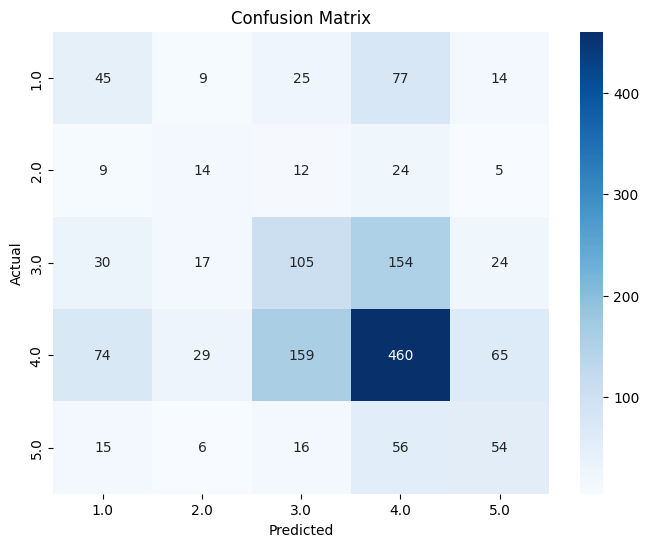

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Actual vs Predicted

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_9548\3170918653.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")


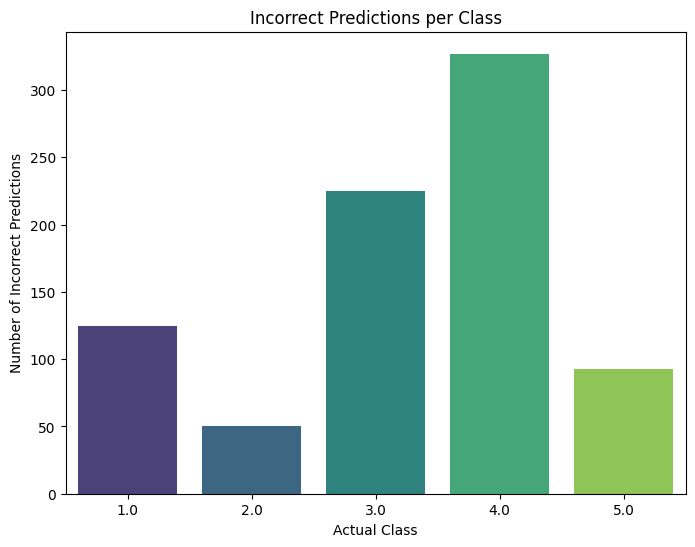

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Noto'g'ri bashoratlar
incorrect = result_df[result_df['Correct'] == False]

# Class bo'yicha xatoliklar soni
error_counts = incorrect['Actual'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")
plt.xlabel("Actual Class")
plt.ylabel("Number of Incorrect Predictions")
plt.title("Incorrect Predictions per Class")
plt.show()
